Transform the word "FOOL" into the word "SAGE".
In a word ladder puzzle you must make the change occur gradually by changing one letter at a time.
At each step you must transform one word into another word,  you are not allowed to transform a word into a non-word.

- We can solve this problem by using a graph algorithm
    - Represent the relationships between thewords as a graph.
    - Use the graph algorithm known as breadth first search to find an efficient path from the starting word to the ending word.

- Figuie out how to turn a large collection of words into a graph.
- What we would like is to have an edge from one word to another if the two words are only different by single letter.
- Then any path from one word to another is a solution to the word ladder puzzle.

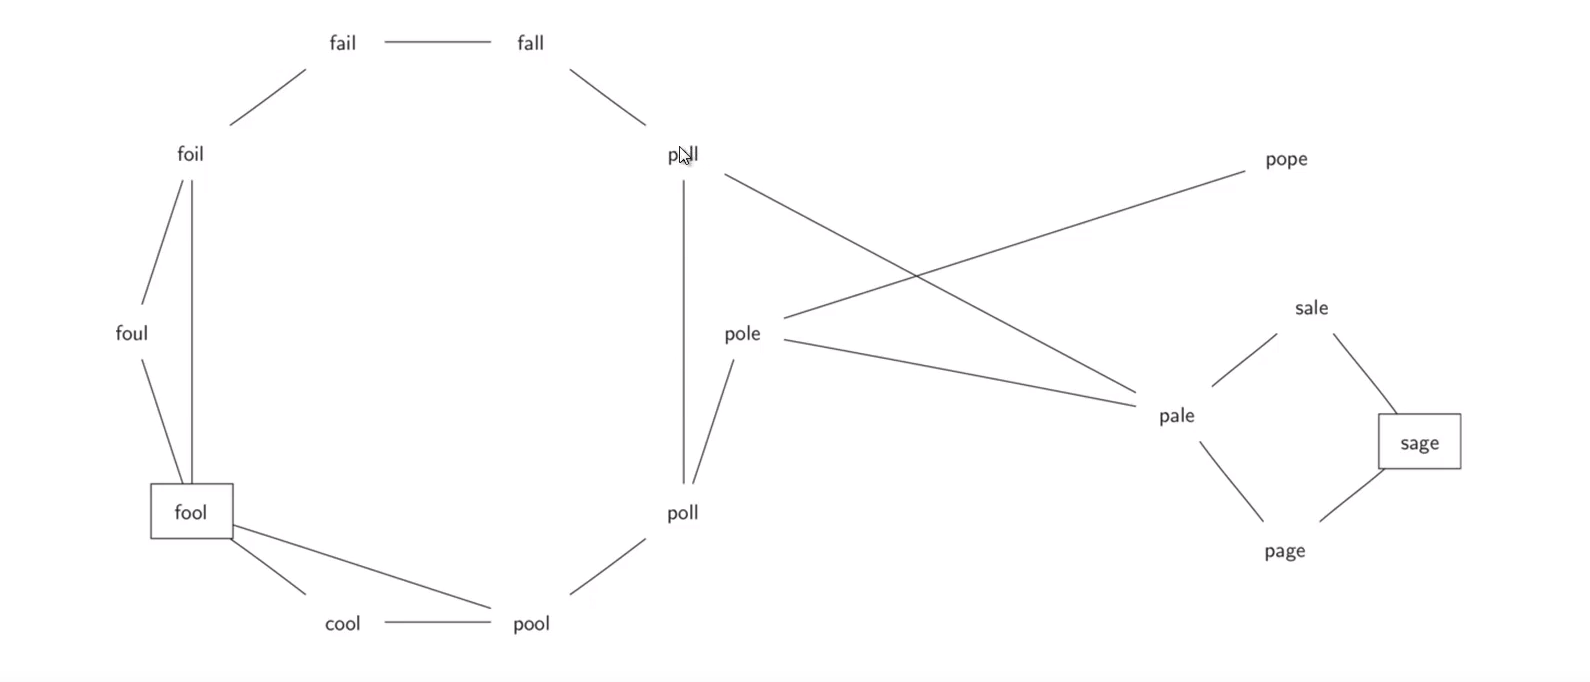

- Suppose that we have a huge number of buckets, each of them with a four-letter word on the outside, except that one of the letters in the label has been replaced by an underscore.
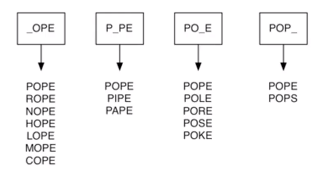

- We can implement the scheme we have just described by using a dictionary.
- The labels on the buckets we have just described are the keys in our dictionary.
- The value stored for that key is a list of words.
- Once we have the dictionary built we can create the graph.
- We start out graph by creating a vertex for each word in the graph.
- Then we create edges between all the vertices we find for words found under the same key in the dictionary.

In [1]:
class Vertex:
    
    def __init__(self, key):
        self.id = key
        
        # Each Vertex uses a dictionary to keep track of 
        # the vertices to which it is connected, 
        # and the weight of each edge
        
        self.connectedTo = {}
        
    def addNeighbor(self, nbr, weight):
        '''
        add a connection from this vertex to another
        '''
        self.connectedTo[nbr] = weight
        
    def getConnections(self):
        '''
        returns all of the vertices in the adjacency list, 
        as represented by the connectedTo instance variable.
        '''
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self, nbr):
        return self.connectedTo[nbr]
    
    def __str__(self):
        return str(self.id) + " connected to: " + str([x.id for x in self.connectedTo])

In [2]:
class Graph:
    
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0
        
    def addVertex(self, key):
        self.numVertices += 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex
    
    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
        
    def addEdge(self, f, t, cost = 0):
        # from, to, weight
        
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
            
        self.vertList[f].addNeighbor(self.vertList[t], cost)
        
    def getVertices(self):
        return self.vertList.keys()
    
    def __iter__(self):
        return iter(self.vertList.values())
    
    def __contains__(self, n):
        return n in self.vertList

In [5]:
def buildGraph(wordFile):
    d = {}
    g = Graph()
    
    wfile = open(wordFile, 'r')
    
    #create buckets of words that differ by one letter
    for line in wfile:
        print(line)
        word = line[:-1]
        print(word)
        
        for i in range(len(word)):
            bucket = word[:1] + "_" + word[i+1:]
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
    
    # add vertices and edgs for words in the same bucket
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    g.addEdge(word1, word2)
                    
    return g